_K_-means clustering is usually used for:
- customer segmentation
- understand what the visitors of a website is trying to accomplish
- pattern recognition
- data compression

In [9]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

print('libraries all imported.')

libraries all imported.


### K-means with manual dataset

Text(0, 0.5, 'x2')

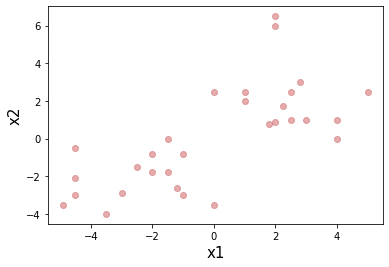

In [2]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

plt.scatter(x1, x2, c = 'indianred', alpha = 0.5)
plt.xlabel('x1', fontsize = 15)
plt.ylabel('x2', fontsize = 15)

In [3]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined.')

assign_members function defined.


In [4]:
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return[center1, center2]

print('update_centers function defined.')

update_centers function defined.


In [5]:
def plot_points (centroids = None, colors = 'g', figure_title = None):
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(1,1,1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth = 5, markersize = 20)
    plt.scatter(x1, x2, s = 500, c = colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint = True)
    yticks = np.linspace(-6, 6, 13, endpoint = True)
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)
    
    ax.xaxis.set_ticks_position ('bottom')
    ax.yaxis.set_ticks_position ('left')
    ax.tick_params('both', length = 2, width = 1, which = 'major', labelsize = 15)
    
    ax.set_xlabel('x1', fontsize = 20)
    ax.set_ylabel('x2', fontsize = 20)
    
    ax.set_title(figure_title, fontsize = 24)
    
    plt.show()

print('plot_points function defined.')

plot_points function defined.


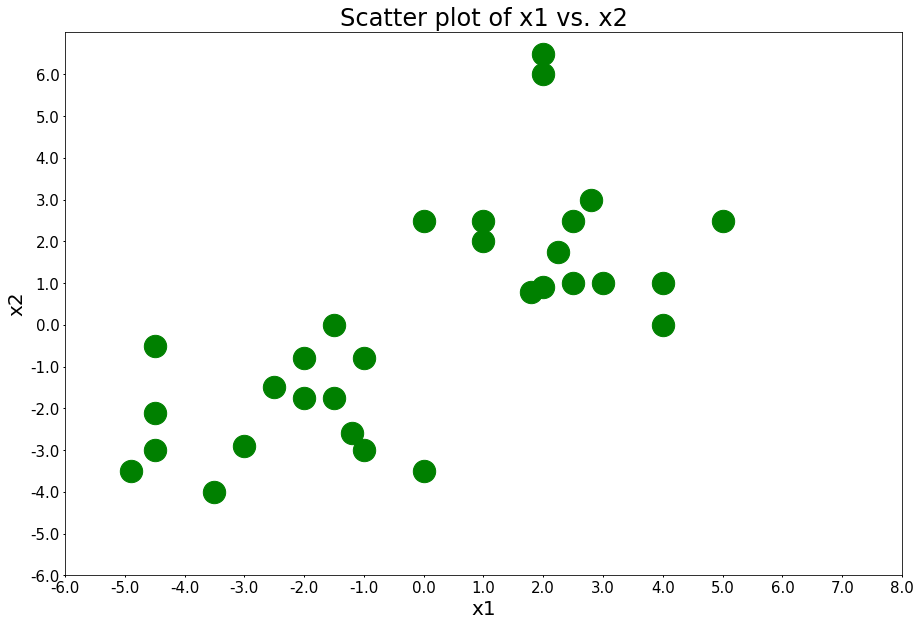

In [6]:
plot_points(figure_title = 'Scatter plot of x1 vs. x2')

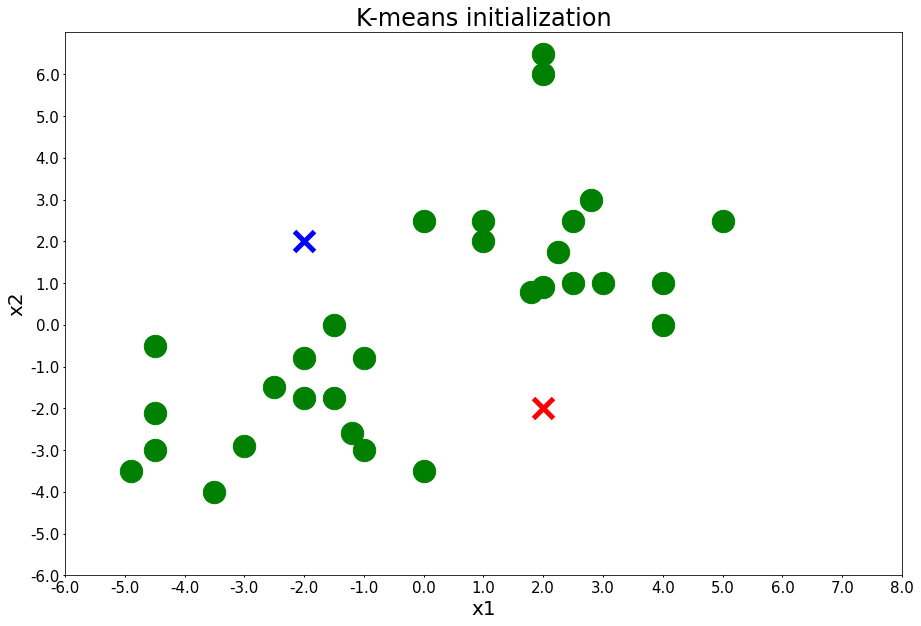

In [7]:
centers = [[-2, 2], [2,-2]]
plot_points(centroids = centers, figure_title = 'K-means initialization')

Iteration1 - please press enter to update the members of each cluster


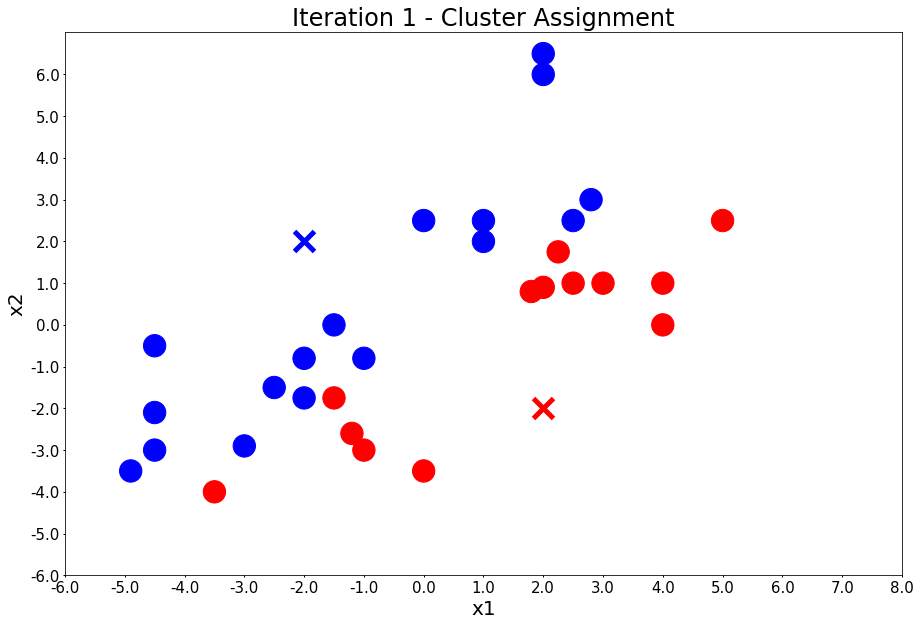

Iteration1 - please press enter to update the centers


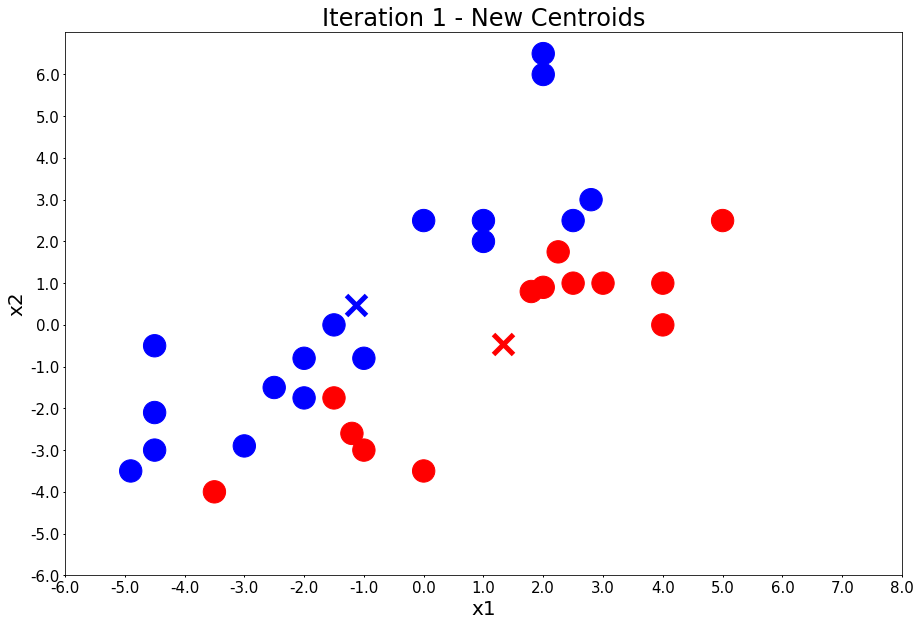

Iteration2 - please press enter to update the members of each cluster


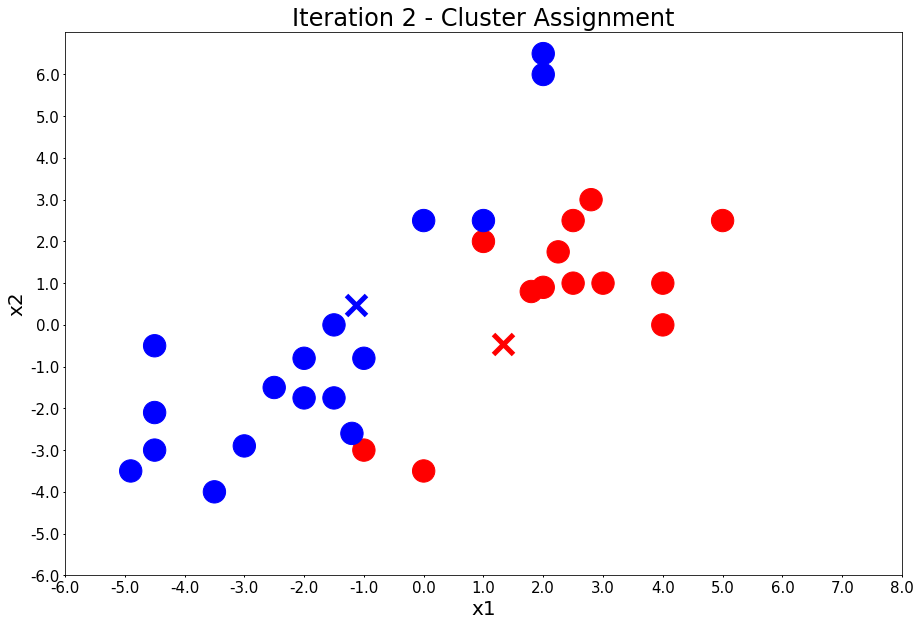

Iteration2 - please press enter to update the centers


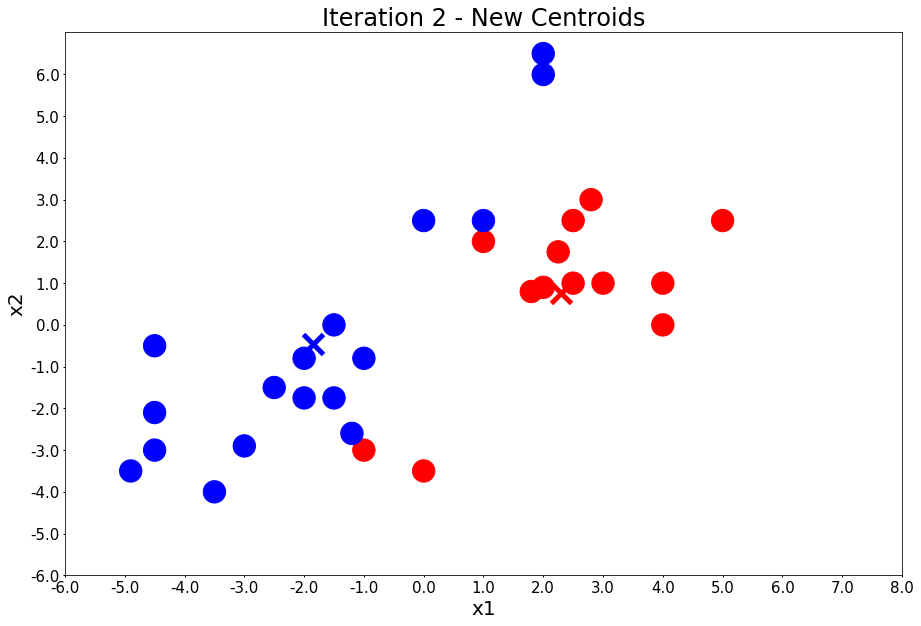

Iteration3 - please press enter to update the members of each cluster


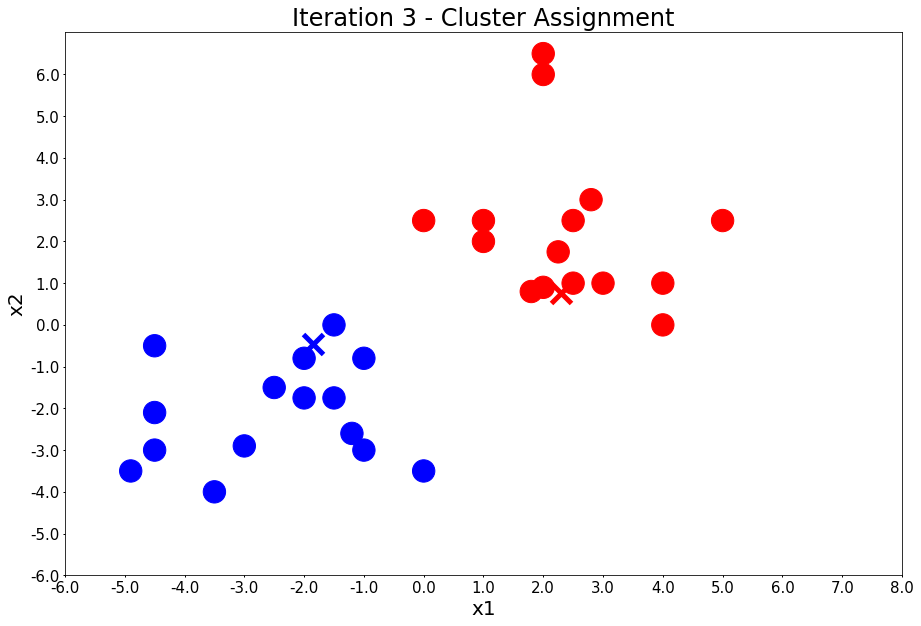

Iteration3 - please press enter to update the centers


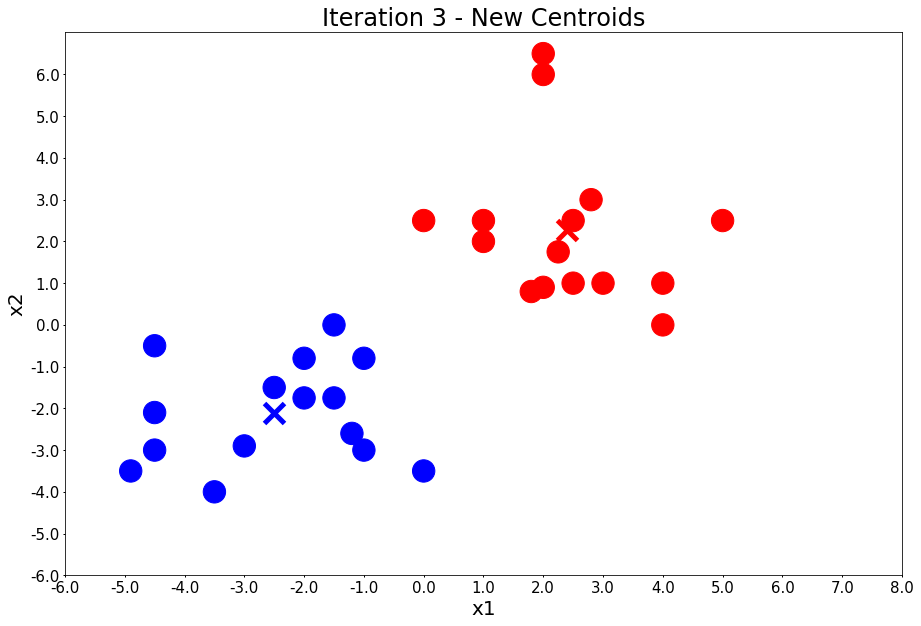

Iteration4 - please press enter to update the members of each cluster


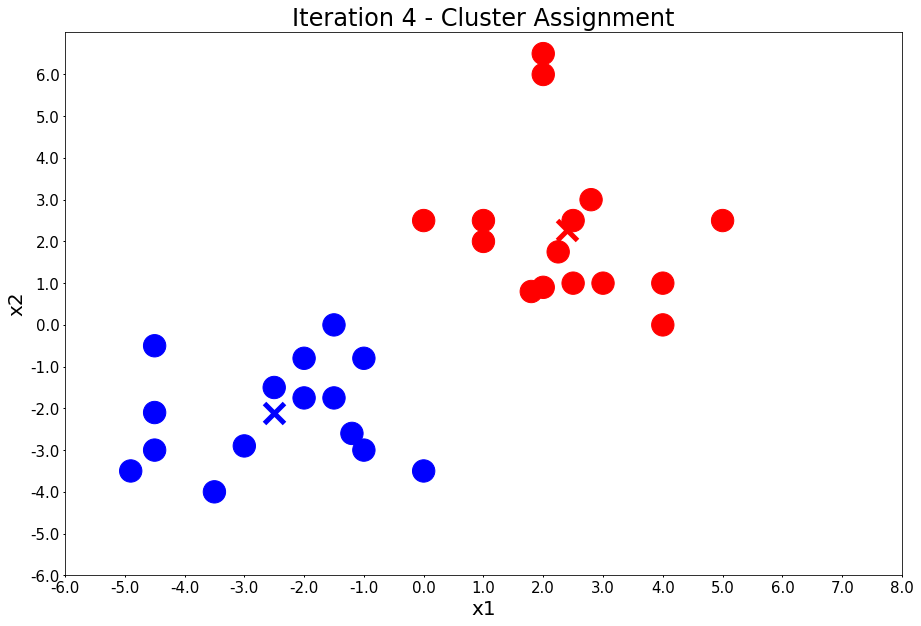

Iteration4 - please press enter to update the centers


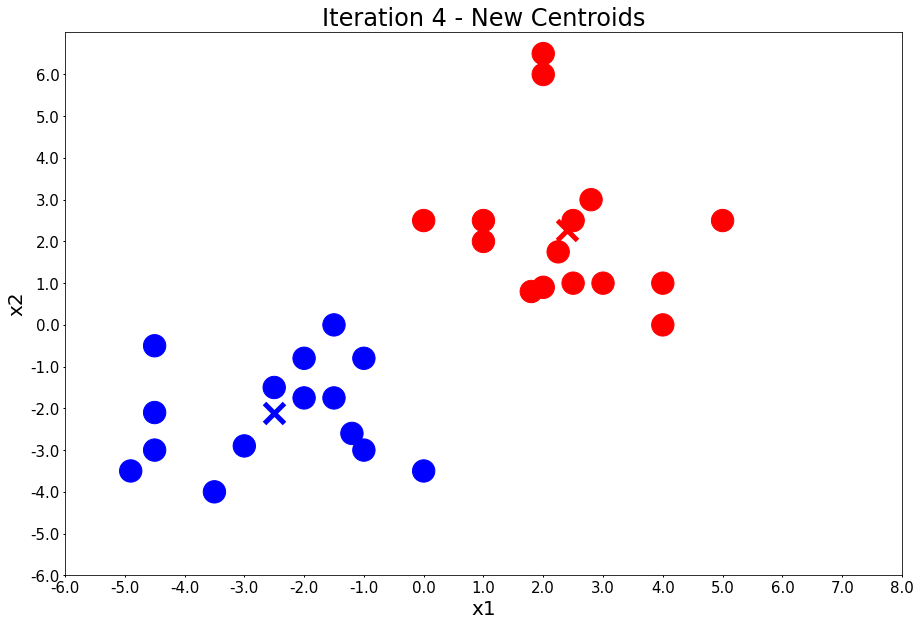

In [8]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration{} - please press enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i+1)
    plot_points(centers, colors, figure_title = title)
    input('Iteration{} - please press enter to update the centers'.format(i+1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - New Centroids'.format(i + 1)
    plot_points(centers, colors, figure_title = title)

In the end, the centroids tend to stabelize and not move any more.

### K-means with dataset generated by random

In [79]:
np.random.seed(0)

In [96]:
X, y = make_blobs(n_samples = 5000, centers = [[4,4], [-2,-1], [2,-3], [1,1]], cluster_std = 0.9)
#X are the samples
#y are the cluster to each sample

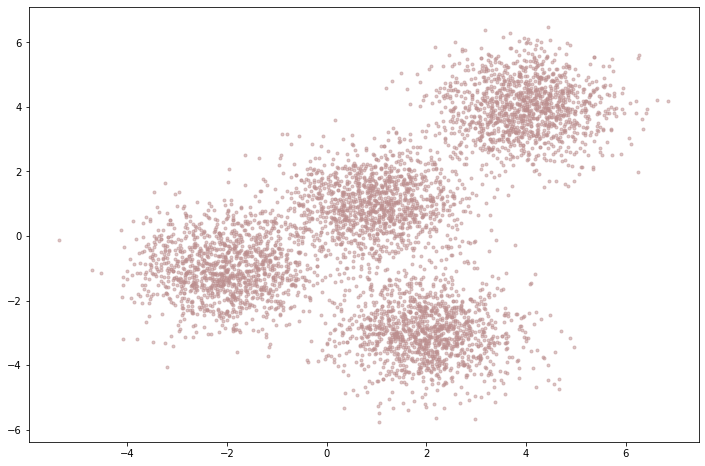

In [97]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0],X[:, 1], marker = '.', alpha = 0.5, color = 'rosybrown')

In [98]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 10)
k_means.fit(X)
k_means_labels = k_means.labels_

In [99]:
k_means_labels[0:10]

array([1, 2, 3, 0, 3, 2, 1, 0, 2, 2])

In [100]:
y[0:10]

array([3, 1, 3, 1, 3, 1, 0, 2, 1, 1])

In [101]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 2.0108729 , -3.0117458 ],
       [ 3.97289879,  3.97679435],
       [-2.03588836, -1.00418244],
       [ 0.97548908,  0.99631736]])

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y, k_means_labels)

0.2404

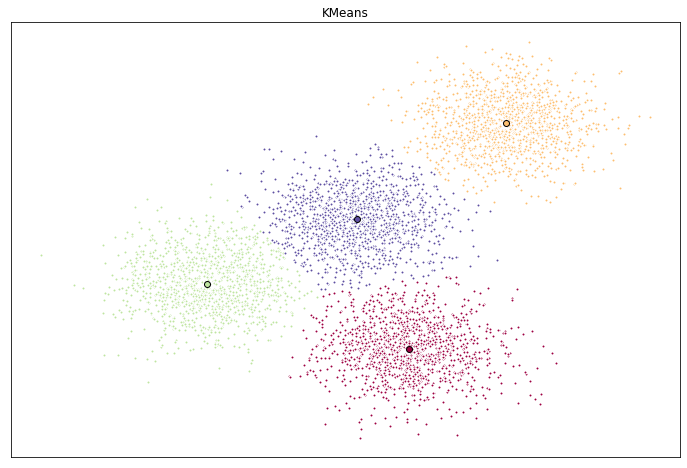

In [103]:
fig = plt.figure(figsize = (12, 8))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1,1,1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker = '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [104]:
import wget

In [108]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/customer_segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [109]:
df = df.drop('Address', axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [112]:
from sklearn.preprocessing import StandardScaler
X = df.values[:, 1:]
X = np.nan_to_num(X)
cluster_df = StandardScaler().fit_transform(X)
cluster_df[0:5]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653]])

In [118]:
num_clusters = 3

k_means = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 12)
k_means.fit(cluster_df)
labels = k_means.labels_
print(labels[0:10])

[1 2 0 1 2 2 1 1 1 2]


In [119]:
df['labels'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [120]:
df.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


- old, high education, high income, indebted
- young, middle income, less indebted
- young, low income, indebted